# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [1]:
# import packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand

## Generating social media data

In [3]:
# define list of categories for random data
categories = ['food', 'travel', 'fashion', 'fitness', 'music', 'culture', 'family', 'health']

# generate data dictionary with date, category, and number of like columns
data = {'date': pd.date_range('2023-01-01', periods=500),
        'category': [rand.choice(categories) for _ in range(500)],
        'likes': np.random.randint(0, 10000, size=500)}

Generating new social media data will result in new, and potentially unique, sets of data each time this cell is executed. Because of this, following Markdown cells may not accurately specify the same data as generated for the initial run of this project. However, the code is still meant to be broadly applicable and should still function as intended.

For instance, due to the way the data generation is structured in this section, missing or duplicate values should continue to never appear in the dataset, because the range to generate values from does not include these possibilities, and each entry in the dataframe has a unique date.

## Data exploration

In [4]:
# inspect first few rows of generated dataframe
df0 = pd.DataFrame(data)
df0.head(10)

,date,category,likes
0,2023-01-01,culture,6293
1,2023-01-02,music,5627
2,2023-01-03,culture,8805
3,2023-01-04,fashion,3046
4,2023-01-05,fashion,9008
5,2023-01-06,food,2866
6,2023-01-07,travel,4676
7,2023-01-08,travel,7440
8,2023-01-09,fashion,467
9,2023-01-10,culture,7811


In [5]:
# inspect category counts for dataframe
df0['category'].value_counts()

music      76
fitness    67
family     65
food       63
travel     61
culture    59
fashion    55
health     54
Name: category, dtype: int64

## Data cleaning

In [6]:
# inspect dataframe for potential removal of null values
df0.isna().sum()

# all periods are found to not have missing values
# to preserve original data, a new dataframe will be created, which would be a useful additional step if there had been missing values
df1 = df0.dropna()
print(df1.head(10))

        date category  likes
0 2023-01-01  culture   6293
1 2023-01-02    music   5627
2 2023-01-03  culture   8805
3 2023-01-04  fashion   3046
4 2023-01-05  fashion   9008
5 2023-01-06     food   2866
6 2023-01-07   travel   4676
7 2023-01-08   travel   7440
8 2023-01-09  fashion    467
9 2023-01-10  culture   7811


In [7]:
# inspect dataframe for potential removal of duplicate values
df0.duplicated().sum()

# the dataframe is found to not have any duplicated values
# continuing with preserving the original data, df1 will be modified with the extra step of removing duplicate values, which would be useful in cases where they had been present
df1.dropna(inplace = True)
print(df1.head(10))

        date category  likes
0 2023-01-01  culture   6293
1 2023-01-02    music   5627
2 2023-01-03  culture   8805
3 2023-01-04  fashion   3046
4 2023-01-05  fashion   9008
5 2023-01-06     food   2866
6 2023-01-07   travel   4676
7 2023-01-08   travel   7440
8 2023-01-09  fashion    467
9 2023-01-10  culture   7811


In [8]:
# examine data types of variables in dataframe to prepare for future steps
df1.dtypes

date        datetime64[ns]
category            object
likes                int64
dtype: object

No null values or duplicated entries were found to be present in the data, so no data was needed to be removed from the dataframe prior to the next steps. The data types of each variable were inspected, with the `date` variable having the `datetime64` dtype, `category` having the `object` dtype, and `likes` having the `int` dtype. These data types are expected, but minor transformations are needed in order to proceed.

In [9]:
# convert `date` variable to `datetime` format to ensure consistency of the column
df1['date'] = pd.to_datetime(df1['date'])
# check the first few rows to check work
print(df1.head(10))

        date category  likes
0 2023-01-01  culture   6293
1 2023-01-02    music   5627
2 2023-01-03  culture   8805
3 2023-01-04  fashion   3046
4 2023-01-05  fashion   9008
5 2023-01-06     food   2866
6 2023-01-07   travel   4676
7 2023-01-08   travel   7440
8 2023-01-09  fashion    467
9 2023-01-10  culture   7811


In [10]:
# convert `likes` variable to `integer` format
df1['likes'] = df1['likes'].astype(int)
# check first few rows to check work
print(df1.head(10))

        date category  likes
0 2023-01-01  culture   6293
1 2023-01-02    music   5627
2 2023-01-03  culture   8805
3 2023-01-04  fashion   3046
4 2023-01-05  fashion   9008
5 2023-01-06     food   2866
6 2023-01-07   travel   4676
7 2023-01-08   travel   7440
8 2023-01-09  fashion    467
9 2023-01-10  culture   7811


In [11]:
# recheck dataframe data types to ensure they have properly changed
df1.dtypes
# although there were no changes to dtypes in this instance, these steps should still have been used to thoroughly check the quality of data

date        datetime64[ns]
category            object
likes                int64
dtype: object

In [12]:
# recheck value counts of categories after duplicate/missing values have been removed from the data
df1['category'].value_counts()

music      76
fitness    67
family     65
food       63
travel     61
culture    59
fashion    55
health     54
Name: category, dtype: int64

## Data visualization

In [13]:
# identify general statistics about social media posts
df1.describe()

,likes
count,500.000000
mean,5097.152000
std,2888.912159
min,37.000000
25%,2605.500000
50%,5322.000000
75%,7445.500000
max,9999.000000


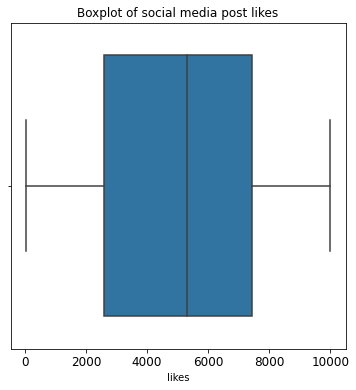

In [14]:
# create boxplot for visualization of `likes` across all categories of posts
plt.figure(figsize=(6,6))
plt.title('Boxplot of social media post likes', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['likes'])
plt.show()
# using a boxplot will also help to identify potential outliers in the data

A visualized boxplot of `likes` containing values from social media posts across all categories displays a broad range of values, with no outliers outside the whiskers of the boxplot. The minimum values of likes is observed to be roughly 0, with a maximum around 10000. The average value of likes across the posts is between 4000 and 6000, visually estimated to be roughly 5250.

Use of the `describe` function with the data confirms these values, with a minimum of 37, maximum of 9999, and an average of 5097.

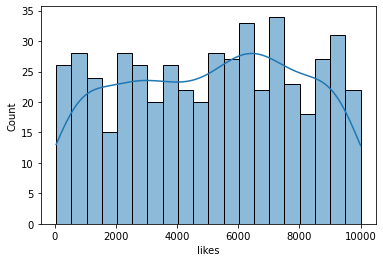

In [28]:
# histogram of social media posts based on `like` values
sns.histplot(data=df1, x='likes', kde=True, bins=20)

For this dataset there does not appear to be a consistent trend for `like` values. If using actual data, values may be more likely to have a normal distribution, with relatively few posts achieving the highest `like` values, and a higher count of posts with `like` values surrounding the median value.

Going forward, it may be most useful to identify categories of posts with the highest concentration and mean value of `likes`, as well as the category of post which is able to achieve the most `likes`.

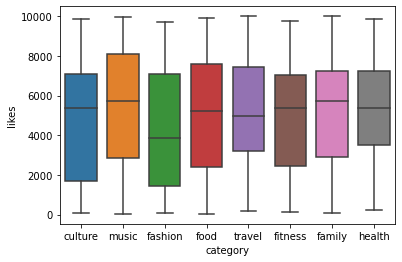

In [15]:
# boxplot for `likes` by `category` of post
sns.boxplot(data=df1, x='category', y='likes', width=.75)

Based on the box plots for each category of social media post, each category has a high degree of variation to which posts get likes. Minimum and maximum values of `likes` for each `category` are roughly similar for each, and many of the categories have similar average values, those being the `category` of `culture`, `food`, `fitness`, and `health`. The category of `music` and `family` have slightly higher average `like` values, while `travel` has a slightly lower average, and `fashion` has a noticeably lower average.

The `health` and `travel` categories have quartile values closest to their category-averages, suggesting a higher consistency in likes for that category of posts than others.

In [44]:
# calculate mean `like` values for the posts of each `category`
df1.groupby('category').mean()

,likes
category,
culture,4753.440678
family,5351.338462
fashion,4399.018182
fitness,4895.925373
food,5039.682540
health,5394.074074
music,5510.342105
travel,5290.934426


Information found through the `groupby` method honed in on the insights gained through the above boxplots. `fashion` as a category has the lowest mean when compared to the others, with `music`, `health`, `family`, and `travel` mean like values being relatively higher, around 5300. The categories of `culture`, `fitness`, and `food` are in the middle of the pack, having mean like values hovering around 5000.

Contrary to the visual observations stated above, `travel` and `health` have values in the upper half of the like-mean values, which could be attributed to visual discrepancies. It was a valuable decision to check the actual mean values.

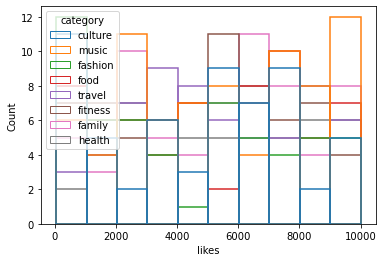

In [43]:
# histogram showing count of post `likes`, separated by `category`
sns.histplot(df1, x='likes', hue='category', fill=False)

While visually intimidating, this histogram does display some key pieces of information that this project was aiming to find. For this dataset, posts in the `music` category were able to achieve the social media posts with the most likes across all categories, with those 12 posts reaching above 9000 likes. Other categories were able to achieve similar successes, with `family`-categorized posts having 8 posts reach that threshold, `food` having 7, and `travel` having 6.

In a broader scope, this information is not too applicable to providing broader insights on post-liking behavior. Although `music` had several of the most-liked posts, that is only 12 of the 76, and there are similar small ratios for the other categories. It would prove difficult to mimic the success of these high-like achieving posts based on solely the information in this project.

## Conclusions

The process of data analysis in this project was relatively small. There were only 3 variables present in the dataframe to work with, and the `date` variable was not used at all throughout the analysis process (and only would not have provided useful information). The practices of randomly-generating data and creating tables and visualizations was useful, but the scope of the data seemed to limit the insights that could be gained from the dataset.

Insights gained about the randomly-generated data primarily concerned specific categories of posts. A wide variety of posts were generated, with nearly the entire range of possible `likes` (0-10000) being covered. The "sampling" of data did not lead to one category being over-represented compared to others, with each of the 8 categories having at least 50 entries and a maximum under 80 entries.

In terms of actionable in-sights, user engagement is highest with posts categorized as `music`, `health`, `family`, or `travel`. This is indicated by the higher mean amount of `likes` for these posts. Individual posts with the highest engagement were in the `music`, `family`, `food`, and `travel` categories, matching three of the categories with higher mean `likes`. Because of this, those seeking high post engagement, or seeking to study posts with high engagement, should start with posts in `music`, `family`, and `travel`, as suggested by this data.

Limitations of the data come from it being highly idealized. In reality, there are far more social media posts being created on a daily basis. In comparison to the data used here, 500 posts to analyze don't seem very likely to accurately reflect social media trends and posts happening in reality, which may produce patterns in stark contrast to the randomly-generated ones presented here. Posts in this project were also only able to be contained in a single category, which is another factor which seems to limit the applicability of data. What should a post where a group of friends travel to a destination concert-venue for a music festival be categorized as? `culture`? `music`? `travel`? In this simplified instance, that post could only be in one of the categories, whereas reality would likely be able to have it fit under any combination of these.